<a href="https://colab.research.google.com/github/AngelLizardo-Waggamer/linear-regression-rpy2/blob/main/Actividad_7_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar dependencias (de ser necesario)


In [11]:
# Instalar librería Rpy2 (si no está instalada)
!pip install rpy2

In [12]:
# Esta es una dependencia de ggplot
!R -e "install.packages('lazyeval', repos='http://cran.rstudio.com/')"


R version 4.4.3 (2025-02-28) -- "Trophy Case"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('lazyeval', repos='http://cran.rstudio.com/')
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.rstudio.com/src/contrib/lazyeval_0.2.2.tar.gz'
Content type 'application/x-gzip' length 83482 bytes (81 KB)
downloaded 81 KB

* installing *source* pac

Importar librerías

In [63]:
# Sección uno
from rpy2.robjects.packages import importr
utils = importr('utils')
stats = importr('stats')

In [64]:
# Sección dos
import rpy2.robjects.lib.ggplot2 as gp
from rpy2.robjects import Formula, rl
from rpy2.ipython.ggplot import image_png

Directorio del archivo .csv

In [22]:
path_archivo = "./publicidad_ganancias.csv"

Generar una variable con los datos en R

In [23]:
datos = utils.read_csv(path_archivo)

Generar el modelo

In [37]:
fmla = Formula('ganancias ~ gasto_publicidad')
env = fmla.environment
env['gasto_publicidad'] = datos.rx2(2)
env['ganancias'] = datos.rx2(3)

regresion = stats.lm(fmla)

Mostrar los coeficientes calculados

In [38]:
print(stats.coef(regresion))

     (Intercept) gasto_publicidad 
    2.024177e+04     2.280726e-01 



#Caso 2
Mostrar un gráfico de dispersión del modelo

`geom_smooth()` using formula = 'y ~ x'


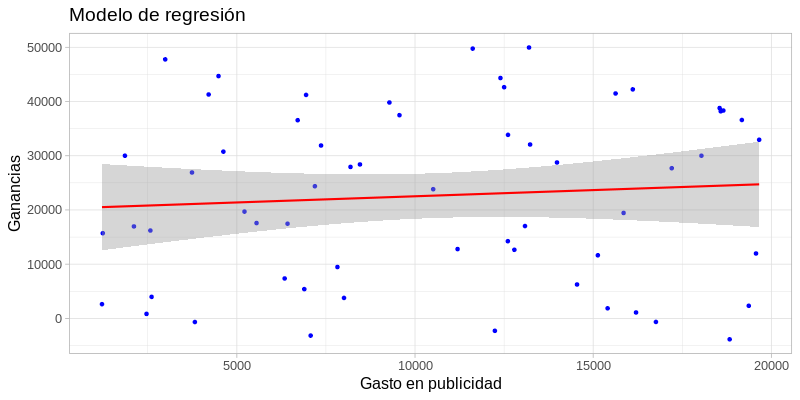

In [61]:
grafico = (gp.ggplot(datos)
+ gp.aes(
    x = rl('gasto_publicidad'),
    y = rl('ganancias'),
)
+ gp.geom_point(color = "blue")
+ gp.geom_smooth(method="lm", color = "red")
+ gp.ggtitle('Modelo de regresión')
+ gp.xlab('Gasto en publicidad')
+ gp.ylab('Ganancias')
+ gp.theme_light(base_size=16))

image_png(grafico)